In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/My Drive/1.0 AI Final Project/LSTM with Framework"
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/1.0 AI Final Project/LSTM with Framework
'Confusion Matrix Model 1.png'	'LSTM M1.ipynb'  'Model 1 Accuracy.png'
'Data Pre-Processing.ipynb'	 lstm_m2.h5	  x_test.npy
 dataset_attack.csv		'LSTM M2.ipynb'   x_train.npy
 dataset_normal.csv		'LSTM M3.ipynb'   y_test.npy
 lstm_m1.h5			'LSTM M4.ipynb'   y_train.npy


# Load the Data set



1.   Load the training DDoS X dataframe
2.   Load the training DDoS Y dataframe
3.   Load the testing DDoS X dataframe
4.   Load the testing DDoS Y dataframe



In [2]:
import pandas as pd
import numpy as np

X_train = np.load("x_train.npy")
X_test = np.load("x_test.npy")
Y_train = np.load("y_train.npy", allow_pickle=True)
Y_test = np.load("y_test.npy",  allow_pickle=True)

print("Training Dataset X:\n")
print(X_train.shape)

print("Prediction Training Dataset Y:\n")
print(Y_train.shape)

print("Testing Dataset X:\n")
print(X_test.shape)

print("Testing Dataset Y:\n")
print(Y_test.shape)

Training Dataset X:

(79978, 25, 25)
Prediction Training Dataset Y:

(79978,)
Testing Dataset X:

(19995, 25, 25)
Testing Dataset Y:

(19995,)


# Reshape the data

LSTMs expect the data to be in an specific format, usually 3D arrays.

In [3]:
import numpy as np

print("Shape Before")
print("\t Training X: ", X_train.shape)
print("\t Testing X: ", X_test.shape)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 25))

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 25))

print("Shape After")
print("\t Training X: ", X_train.shape)
print("\t Testing X: ", X_test.shape)

Shape Before
	 Training X:  (79978, 25, 25)
	 Testing X:  (19995, 25, 25)
Shape After
	 Training X:  (79978, 25, 25)
	 Testing X:  (19995, 25, 25)


# LSTM Model



1.   Import the required modules
2.   Setup the model
3.   Train the model
4.   Compute the accuracy
5.   Save the model



In [4]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

model = Sequential()

model.add(LSTM(128, activation='tanh', kernel_regularizer='l2', return_sequences = True))
model.add(LSTM(128, activation='tanh', kernel_regularizer='l2', return_sequences = True))
model.add(LSTM(128, activation='tanh', kernel_regularizer='l2'))
model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])




In [5]:
X_train=np.asarray(X_train).astype(np.float32)
Y_train=np.asarray(Y_train).astype(np.float32)

history = model.fit(X_train, Y_train, epochs = 50, verbose = 1)

Epoch 1/50
2500/2500 [==============================] - 219s 85ms/step - loss: 0.6856 - accuracy: 0.9188
Epoch 2/50
2500/2500 [==============================] - 218s 87ms/step - loss: 0.1942 - accuracy: 0.9530
Epoch 3/50
2500/2500 [==============================] - 214s 86ms/step - loss: 0.1656 - accuracy: 0.9609
Epoch 4/50
2500/2500 [==============================] - 216s 86ms/step - loss: 0.1891 - accuracy: 0.9546
Epoch 5/50
2500/2500 [==============================] - 220s 88ms/step - loss: 0.1498 - accuracy: 0.9620
Epoch 6/50
2500/2500 [==============================] - 215s 86ms/step - loss: 0.1406 - accuracy: 0.9661
Epoch 7/50
2500/2500 [==============================] - 214s 85ms/step - loss: 0.1450 - accuracy: 0.9642
Epoch 8/50
2500/2500 [==============================] - 215s 86ms/step - loss: 0.1284 - accuracy: 0.9681
Epoch 9/50
2500/2500 [==============================] - 215s 86ms/step - loss: 0.1329 - accuracy: 0.9671
Epoch 10/50
2500/2500 [==============================] 

# Accuracy & Confusion Matrix

In [11]:
model_prediction_results = model.predict(X_test)

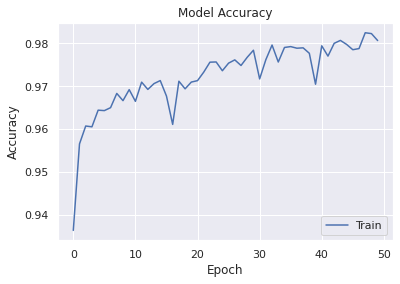

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.savefig('Model 4 Accuracy.png')
plt.show()

In [13]:
tp = 0
tn = 0
fp = 0
fn = 0
model_predictions = model_prediction_results.flatten().round()
model_predictions = model_predictions.tolist()
for i in range(len(Y_test)):
  if model_predictions[i]==1 and Y_test[i]==1:
    tp+=1
  elif model_predictions[i]==0 and Y_test[i]==0:
    tn+=1
  elif model_predictions[i]==0 and Y_test[i]==1:
    fp+=1
  elif model_predictions[i]==1 and Y_test[i]==0:
    fn+=1

Accuracy:  98.56464116029007 



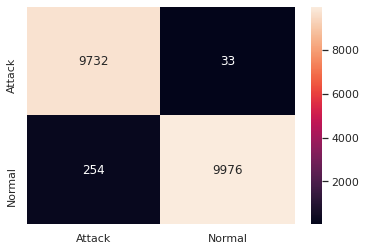

In [14]:
import seaborn as sns; sns.set()

acc = (tp + tn)/ (tp + tn + fp + fn)
print("Accuracy: ", acc*100, "\n")

to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map, annot=True, fmt="d")

figure = ax.get_figure()    
figure.savefig('Confusion Matrix Model 4.png', dpi=400)

# Save the Model

In [15]:
model.save('lstm_m4.h5')